##

### Control bootcamp overview
Contents:
    Highlights of modern control theory
    design controllers
    design sensors (Kalman filters)
    major types of optimal control theory
    what is easy and hard in control theory
    
Dynamical systems analysis has been a great way at describing/predicting the evolution of the system. Optimal control builds on dynamical system analysis by allowing for interventions. 

*Dyanmical systems*: 
$\dot{x} = Ax$

*Control systems*: 
$\dot{x} = Ax + Bu$

#### Types of control: 
Passive control - designed into system upfront/doesn't consume energy
Active control - consumes energy
    Open loop - preplanned control law, always putting in energy through input signal $u_t$
    Closed loop - generally, lower energy than open loop, input signal takes feedback from output signal
    
*Why feedback (closed loop) over open loop control?*
*Uncertainty:* Endogenous system uncertainty in physics model. Allows to deal with uncertainty, an enemy of open loop control. If system deviates from model of system, control laws can adapt. 
*Instability:* feedback can overcome in instabilities (changes eigenvalues of system), i.e. create new stable points.
*Disturbances:* exogenous uncertainties i.e. guest of wind.
    
    


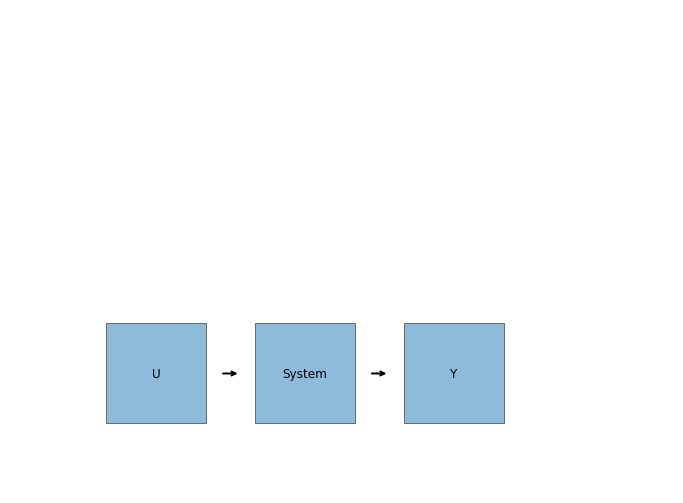

In [14]:
# networkx node shapes come from here: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'

plt.figure(figsize = (12,9))

From = ['U', 'System']
To = ["System", "Y"]

df = pd.DataFrame({ 'from':From,'to':To})
# Define Node Positions
pos = {'U':(1,1),
        'System':(2,1),
        'Y':(3,1)}

"""
# Define Node Colors
NodeColors = {'Food\nProduction':[1,0,1],
        'Transportation':[1,1,0],
        'Energy\nProduction':[0,1,1],
        'Greenhouse\nGas\nEmissions':[1,.5,1],
        'Climate\nChange':[0,1,0],
        'Climate\nFeedbacks':[0,0,1],
        'Everyone$^{Dies}$':[1,0,0]}
"""

Labels = {}
i = 0
for a in From:
    Labels[a]=a
    i +=1
Labels[To[-1]]=To[-1]

# Build your graph. Note that we use the DiGraph function to create the graph! This adds arrows
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )

# Define the colormap and set nodes to circles, but the last one to a triangle
Circles = []
Traingle = []
Colors_Circles = []
Colors_Traingle = []
"""
for n in G.nodes:
    if n != 'Everyone$^{Dies}$':
        Circles.append(n)
        Colors_Circles.append(NodeColors[n])
    else:
        Traingle.append(n)
        Colors_Traingle.append(NodeColors[n])
"""

# By making a white node that is larger, I can make the arrow "start" beyond the node
nodes = nx.draw_networkx_nodes(G, pos, 
                       nodelist = G.nodes,
                       node_size=1.25e4,
                       node_shape='s',
                       node_color='white',
                       alpha=1)

nodes = nx.draw_networkx_nodes(G, pos, 
                       nodelist = G.nodes,
                       node_size=1e4,
                       node_shape='s',
                       edgecolors='black',
                       alpha=0.5)



nx.draw_networkx_labels(G, pos, Labels, font_size=12)

# Again by making the node_size larer, I can have the arrows end before they actually hit the node
edges = nx.draw_networkx_edges(G, pos, node_size=1.8e4,
                               arrowstyle='->',width=2)



plt.xlim(0,4.5)
plt.ylim(0,4)
plt.set_facecolor
plt.axis('off')
plt.show()

### Nomenclature
$u_t$ - Input signal